<a href="https://colab.research.google.com/github/Subashcoder/deep-learning/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [2]:
path=tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print(path)

131072/127831 [==============================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


In [0]:
import pandas as pd

In [4]:
dataset=pd.read_csv(path)
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [0]:
import tensorflow_datasets as tdf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
sentence=dataset['text'].tolist()
lable=dataset['sentiment'].tolist()

In [16]:
tokenizer=tdf.features.text.SubwordTextEncoder.build_from_corpus(sentence,1000,max_subword_length=5)
print(tokenizer.vocab_size)

999


In [0]:
for i,sentences in enumerate(sentence):
  sentence[i]=tokenizer.encode(sentences)

In [19]:
print(sentence[2])

[134, 775, 17, 1, 849, 179, 205, 52, 789]


In [0]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

pad_seq = pad_sequences(sentence , maxlen=max_length, padding=padding_type, truncating=trunc_type )

In [21]:
print(pad_seq[1])

[625 677 626 274 380 633 148 844 789   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [0]:
training_size=int(len(sentence)*0.8)
train_data=pad_seq[:training_size]
test_data=pad_seq[training_size:]
train_leble=lable[:training_size]
test_lable=lable[training_size:]

train_final=np.array(train_leble)
test_final=np.array(test_lable)

In [23]:
print(train_final)

[0 1 1 ... 1 0 1]


In [25]:
model=tf.keras.models.Sequential([
                     tf.keras.layers.Embedding(1000, 16, input_length=max_length),
                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                     tf.keras.layers.Dense(6,activation='relu'),
                     tf.keras.layers.Dense(1,activation='sigmoid')             
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 58,253
Trainable params: 58,253
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
history=model.fit(train_data,train_final,epochs=30,validation_data=(test_data,test_final))


Epoch 1/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5342 - accuracy: 0.9366 - val_loss: 0.6444 - val_accuracy: 0.7619
Epoch 2/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5354 - accuracy: 0.9272 - val_loss: 0.6373 - val_accuracy: 0.7970
Epoch 3/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5282 - accuracy: 0.9485 - val_loss: 0.6431 - val_accuracy: 0.7820
Epoch 4/30
50/50 [==============================] - 2s 36ms/step - loss: 0.5242 - accuracy: 0.9554 - val_loss: 0.6575 - val_accuracy: 0.7669
Epoch 5/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5228 - accuracy: 0.9586 - val_loss: 0.6486 - val_accuracy: 0.7744
Epoch 6/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5217 - accuracy: 0.9605 - val_loss: 0.6602 - val_accuracy: 0.7569
Epoch 7/30
50/50 [==============================] - 2s 37ms/step - loss: 0.5212 - accuracy: 0.9611 - val_loss: 0.6497 - val_accuracy: 0.7694
Epoch 8/30
50

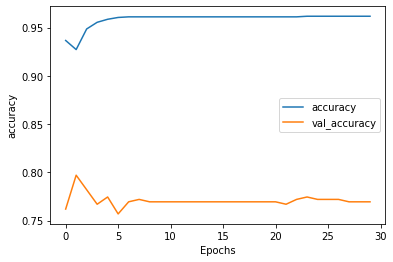

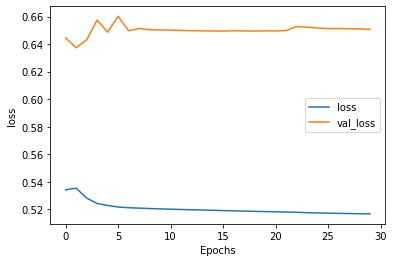

In [43]:
import matplotlib.pyplot as plt
epoch=30


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")